In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [308]:
ms = pd.read_csv("mushroom.csv",sep=",")

In [309]:
ms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Import the data set

In [310]:
ms.shape

(8124, 23)

We have 8124 raws and 23 columns

In [311]:
ms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null value in the dataset

In [312]:
ms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

we have object type value and class are our target variable

In [313]:
ms["class"].unique()

array(['p', 'e'], dtype=object)

There are two unique values in ms['class']

In [314]:
ms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [315]:
ms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# EDA

In [316]:
ms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

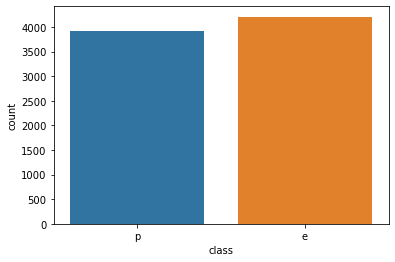

In [317]:
# Graphical representation of each class of mushroom


sns.countplot(x="class",data=ms)
plt.show()

class are almost equaly distributed, there is no class imbalance issue exist

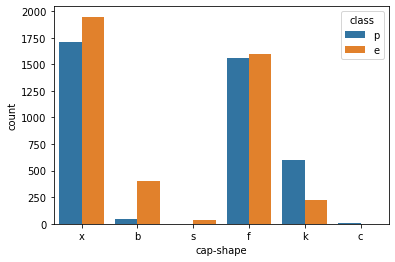

In [318]:
sns.countplot(x="cap-shape",hue='class',data=ms)
plt.show()

x and f both are almost equal count of poisonous and x edible mushroom higher than the x poisonous

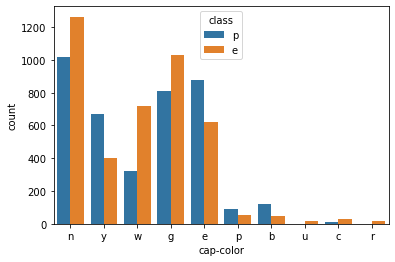

In [319]:
sns.countplot(x="cap-color",hue='class',data=ms)
plt.show()

Here we come to know that increasing the cap-color of mushroom will more edible. At the point of y and e shows that cap-color are more poisonous.

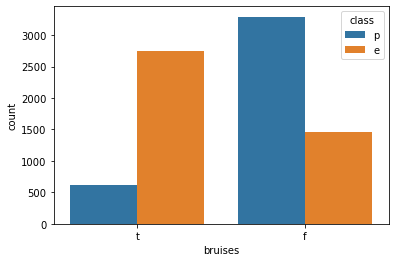

In [320]:
sns.countplot(x="bruises",hue="class",data=ms)
plt.show()

In this case we can conclude that mushrooms without bruises are very high number of poisonous and mushroom with bruises are more edible.

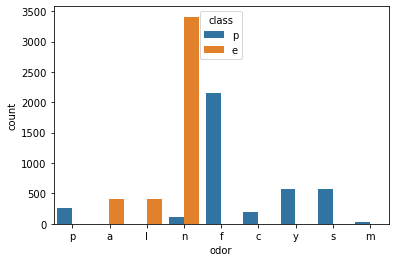

In [321]:
sns.countplot(x="odor",hue="class",data=ms)
plt.show()

Maximum number of edible mushrooms have no smell and maximum number of poisonous mushrooms have foul smell.

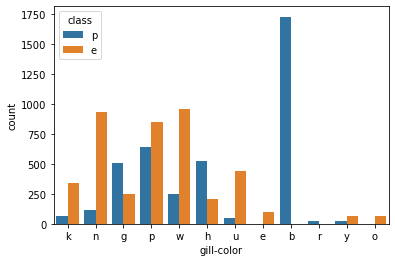

In [322]:
sns.countplot(x="gill-color",hue='class',data=ms)
plt.show()

Mushroom with gill color buff are high poisonous.

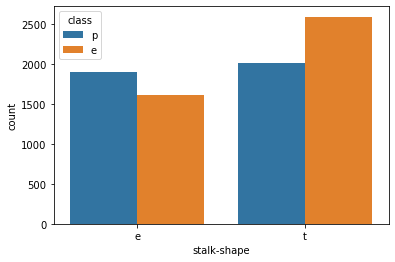

In [323]:
sns.countplot(x="stalk-shape",hue="class",data=ms)
plt.show()

 In this graph we can conclude that e and t are almost equal amount of poisonous.

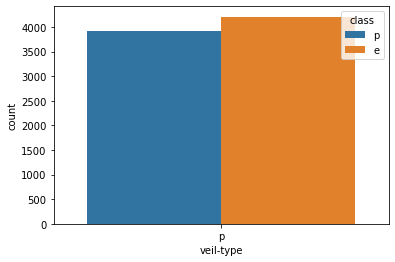

In [324]:
sns.countplot(x="veil-type",hue="class",data=ms)
plt.show()

If we look at the veil-type of mushroom we can't predict it is poisonous or edible.

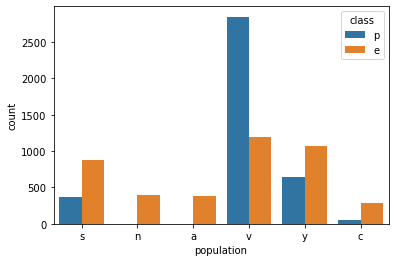

In [325]:
sns.countplot(x="population",hue="class",data=ms)
plt.show()

In [326]:
ms_x = ms.drop(columns=["class"])
y=ms["class"]

Divided the dataset into input(x) and output(y)

In [327]:
ms_x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [328]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

We have 8124 rows and 22 columns

In [329]:
ms_x = pd.get_dummies(ms_x,drop_first=False)

convert the input data into integer using get_dummies

In [330]:
ms_x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [331]:
ms_x.shape

(8124, 117)

In [332]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

convert the target(output) variable into integer using LabelEncoder

In [333]:
sc=StandardScaler()
x=sc.fit_transform(ms_x)
x=pd.DataFrame(x,columns=ms_x.columns)


Bring the input dataset into a common scale.While using the standardscaler the model can predict the output good

In [334]:
testpca = PCA()
testdata = testpca.fit(x)

Reduce the number of columns using PCA

In [335]:
testdata.explained_variance_ratio_

array([8.89101688e-02, 8.12547437e-02, 7.20360067e-02, 5.85864962e-02,
       5.18813706e-02, 4.39384939e-02, 4.05311162e-02, 2.83171624e-02,
       2.35580671e-02, 2.23764678e-02, 1.93936917e-02, 1.86436129e-02,
       1.79725410e-02, 1.57852165e-02, 1.43137572e-02, 1.33845537e-02,
       1.20142218e-02, 1.13904862e-02, 1.12974329e-02, 1.09215113e-02,
       1.04749300e-02, 9.86321120e-03, 9.77409885e-03, 9.52703898e-03,
       9.49454033e-03, 9.27854833e-03, 9.25846375e-03, 9.16722701e-03,
       9.06712620e-03, 8.78041933e-03, 8.72377712e-03, 8.67192704e-03,
       8.67192704e-03, 8.63770138e-03, 8.57362322e-03, 8.50639716e-03,
       8.35003542e-03, 8.14736954e-03, 8.03145750e-03, 7.94307939e-03,
       7.66757315e-03, 7.53134900e-03, 7.19602054e-03, 7.10497220e-03,
       6.94259954e-03, 6.79312425e-03, 6.68186078e-03, 6.38322825e-03,
       6.20442957e-03, 6.04248247e-03, 6.00369729e-03, 5.71844989e-03,
       5.60384817e-03, 5.38049914e-03, 5.19795326e-03, 5.06941504e-03,
      

In [336]:
var_cumu = np.cumsum(testdata.explained_variance_ratio_)*100
var_cumu

array([  8.89101688,  17.01649124,  24.22009191,  30.07874154,
        35.2668786 ,  39.660728  ,  43.71383962,  46.54555586,
        48.90136257,  51.13900935,  53.07837852,  54.9427398 ,
        56.73999391,  58.31851555,  59.74989127,  61.08834664,
        62.28976882,  63.42881744,  64.55856073,  65.65071186,
        66.69820486,  67.68452598,  68.66193587,  69.61463977,
        70.5640938 ,  71.49194863,  72.41779501,  73.33451771,
        74.24123033,  75.11927226,  75.99164997,  76.85884268,
        77.72603538,  78.58980552,  79.44716784,  80.29780756,
        81.1328111 ,  81.94754805,  82.7506938 ,  83.54500174,
        84.31175906,  85.06489396,  85.78449601,  86.49499323,
        87.18925319,  87.86856561,  88.53675169,  89.17507451,
        89.79551747,  90.39976572,  91.00013545,  91.57198044,
        92.13236525,  92.67041517,  93.19021049,  93.697152  ,
        94.17277133,  94.61948891,  95.04844861,  95.46449291,
        95.87438011,  96.25530559,  96.60844667,  96.95

In [337]:
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance",k)

Number of components explaining 95% variance 58


In [338]:
newpca = PCA(n_components=58)
x=newpca.fit_transform(x)

Now We have 58 columns without loosing more than 95% data

In [339]:
print('x:',x.shape)

x: (8124, 58)


In [340]:
maxaccu = 0
maxrs = 0
for i in range(40,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    Lr = LogisticRegression()
    Lr.fit(x_train,y_train)
    pred = Lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        
print("best accuracy is ",maxaccu,"on random_state",maxrs)        

best accuracy is  1.0 on random_state 44


In [341]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=44)

We have found best random_state value as 44.We will create our train_test_split using random_state 44

In [342]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
1.0
[[1349    0]
 [   0 1332]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1349
           1       1.00      1.00      1.00      1332

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [343]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
1.0
[[1349    0]
 [   0 1332]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1349
           1       1.00      1.00      1.00      1332

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [344]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9951510630361805
[[1343    6]
 [   7 1325]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1349
           1       1.00      0.99      1.00      1332

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



# Cross validation

In [345]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.9133221674876847


In [346]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.8734208412277378


In [347]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.878345282303903


# Best Model

minimum difference in accuracy and cross validation score is for DicisionTreeClassifier so this is our best model

# Hyper parameter tuning

For improving best model accuracy using GridSearchCV

In [348]:
parameter = {'max_depth':np.arange(2,10),
            'criterion':['gini','entropy']}

Creating parameter list to pass in GridSearchCV

In [349]:
gcv=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

Tuning DecisionTreeClassifier

In [350]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [351]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 7}

Printing the best parameter found by GridSearchCV

In [354]:
final_mod =DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=44)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

99.62700484893696


# Saving The Model

In [353]:
joblib.dump(final_mod,"ms_model.pkl")

['ms_model.pkl']